<a href="https://colab.research.google.com/github/hakim-cyber/Comp-Science-for-physics-and-chemistry/blob/main/PW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

exercise 1


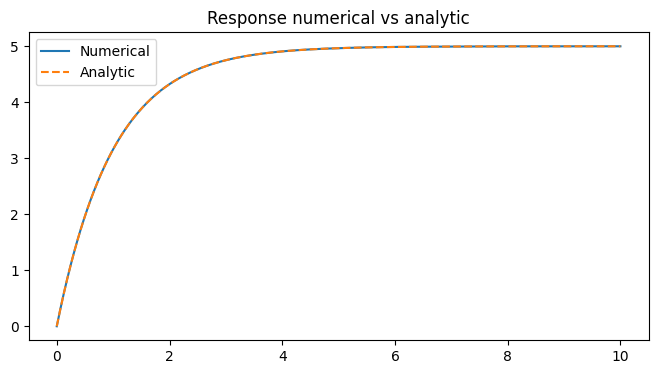

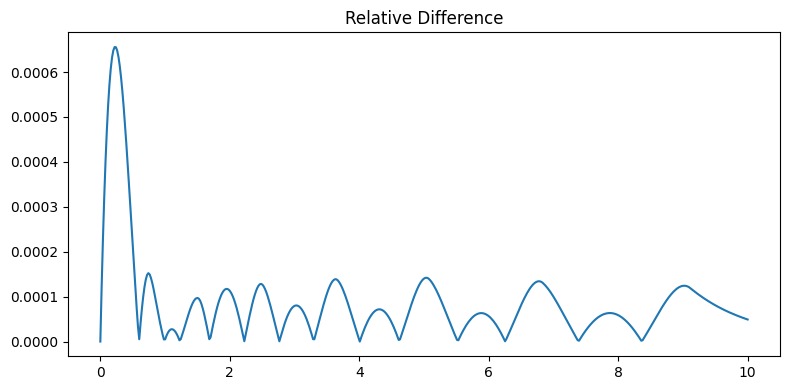

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# consts
R = 1e3
C = 1e-9
Vin = 5
t_end = 10e-6

# diff eq
def dVdt(t, Vc):
    return (1 / (R * C)) * (Vin - Vc)

# time vect
t_eval = np.linspace(0, t_end, 500)

# integral
sol = solve_ivp(dVdt, [0, t_end] , [0], t_eval=t_eval)
Vc_num = sol.y[0] #voltages list

# analytic , we use integration factor method to find this formula, we also take initial Vc(0) = 0
Vc_analytic = Vin * (1 - np.exp(-t_eval / (R * C)))

# Relative diff

eps = 1e-15  # tiny num so denom  never zero
rel_diff = np.abs((Vc_num - Vc_analytic) / np.maximum(Vc_analytic, eps))

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t_eval * 1e6, Vc_num, label="Numerical")
plt.plot(t_eval * 1e6, Vc_analytic, '--', markersize=1, label="Analytic")
plt.title("Response numerical vs analytic")
plt.legend()



plt.figure(figsize=(8, 4))
plt.plot(t_eval * 1e6, rel_diff)

plt.title("Relative Difference")

plt.tight_layout()
plt.show()


exercise 2

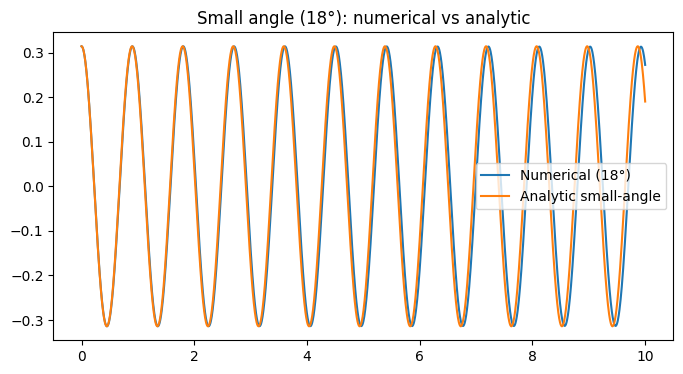

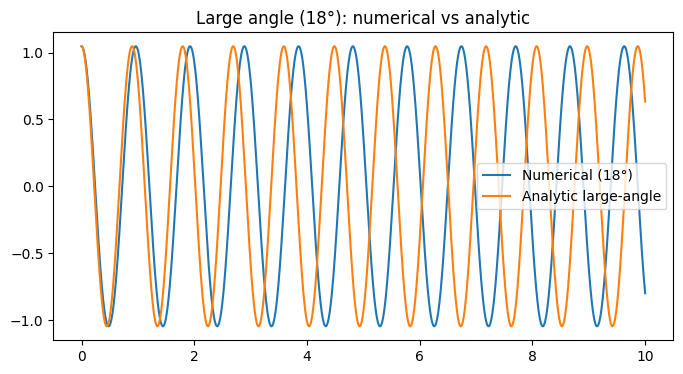

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#consts
g = 9.81
L = 0.20
T = 10.0

def pendulum(t, y):
    theta, omega = y
    return [omega, -(g/L) * np.sin(theta)]


t_eval = np.linspace(0.0, T, 2000)

theta0_small_deg = 18.0
theta0_small = np.radians(theta0_small_deg)
omega0 = 0.0                             # released from rest
y0_small = [theta0_small, omega0]

theta_num_small = solve_ivp(
    pendulum, [0.0, T], y0_small,
    t_eval=t_eval
).y[0]

theta_an_small = theta0_small * np.cos(np.sqrt(g/L) * t_eval) # gave in lecture


theta0_large_deg = 60.0
theta0_large = np.radians(theta0_large_deg)
y0_large = [theta0_large, omega0]

theta_num_large = solve_ivp(
    pendulum, [0.0, T], y0_large,
    t_eval=t_eval, rtol=1e-10, atol=1e-12
).y[0]


theta_an_large = theta0_large * np.cos(np.sqrt(g/L) * t_eval)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t_eval, theta_num_small, label="Numerical (18°)")
plt.plot(t_eval, theta_an_small, "-", label="Analytic small-angle")
plt.title("Small angle (18°): numerical vs analytic")
plt.legend()


# Plot
plt.figure(figsize=(8, 4))
plt.plot(t_eval, theta_num_large, label="Numerical (18°)")
plt.plot(t_eval, theta_an_large, "-", label="Analytic large-angle")
plt.title("Large angle (18°): numerical vs analytic")
plt.legend()
